# Finding the Best Markets to Advertise In

## Introduction

Our goal in this project is to find out the two best markets to advertise our product in. We're working for an an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but also cover many other domains, like data science, game development, etc. We want to promote the product and would like to invest some money in advertisement.

## Understanding the Data

To reach our goal, we can organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(survey.shape)

(18175, 136)


In [2]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using a ready-made data set is a cheaper and faster alternative as opposed to organizing a survey. We can check if the data set is a good representative of the population of interest through some exploration. If there are any missing information not included in the data set, surveys could then be conducted to fill in the gaps. We can also use this data set as a template for the survey if needed.

The data set contains information from 20,000 developers on their learning and job search journey, as well as their salary and other job related data.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Checking for Sample Representativity

As we mentioned earlier, most of the courses offered are on web and mobile development, but other domains are also covered, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [3]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                     2.030892
  Mobile Developer                                                                                                                                                         1.673341
Game Developer                                                                                      

We analyze the JobRoleInterest column that describes what job role each participant would be interested in working. Looking at the top six choices automatically gives us the information we are looking for since our main focus is on web and mobile development. Game development and data scientist is also included in between so we can infer that this data set is representative of the population of interest we are looking for.

## New Coders - Locations and Densities

Now that we found out that the sample has the right categories of people for our goal, we can find out where these new coders are located, and what are the densities (how many coderes there are) for each location.

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. 

To make sure we're working with a representative sample, we are going to drop all the rows where participants didn't answer what role they are interested in.

In [4]:
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

In [5]:
absolute = survey_clean['CountryLive'].value_counts()
relative = survey_clean['CountryLive'].value_counts(normalize=True)*100
pd.DataFrame(data={'Absolute Frequencies': absolute,
                    'Relative Frequencies': relative})

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


According to the analysis we can see that the United States of America and India are the two strongest markets. Advertisement in these countries would yield the highest results.

However, we should look at other vital pieces of information to help us determine their suitability for our courses. One possible point we can look at are trends of absolute frequencies to see any substantial growth in demand of courses.

## Spending Money for Learning

Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. We can continue by figuring out how much money new coders are actually willing to spend on learning. The MoneyForLearning column describes the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Because our course offers monthly subscriptions, we will be looking for how much each student spends per month.

We will be narrowing down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this because these countries have the highest frequencies accumlating about 61% of the total population so we will have a decent amount of data. The courses are also taught in English, and because English is an official language in all four countries, we have a better chance to target the right people.

In [6]:
survey_clean['moneyspent'] = survey_clean['MoneyForLearning'] / survey_clean['MonthsProgramming'].replace(0,1)
survey_clean['moneyspent'].isnull().sum()

675

In [7]:
survey_clean = survey_clean[survey_clean['moneyspent'].notnull()]
survey_clean = survey_clean[survey_clean['CountryLive'].notnull()]

In [8]:
survey_clean.groupby('CountryLive').mean()['moneyspent'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneyspent, dtype: float64

## Dealing with Extreme Outliers

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada.

We can generate some box plots to help identify if any outliers are present.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


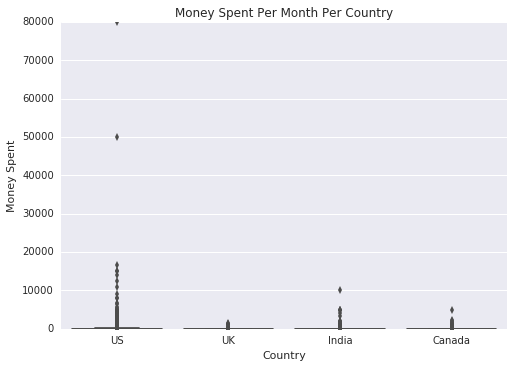

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

four_countries = survey_clean[survey_clean['CountryLive'].isin(
    ['United States of America', 'India', 'United Kingdom', 'Canada'])]

box = sns.boxplot(x='CountryLive', y='moneyspent', data=four_countries)
plt.title('Money Spent Per Month Per Country')
plt.xlabel('Country')
plt.ylabel('Money Spent')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada'])
plt.show()

We can identify some outliers for the US somewhere around 50,000 and higher. These values seem a bit far-fetched so we can remove any values above 20,000.

In [10]:
four_countries = four_countries[four_countries['moneyspent'] < 20000]
four_countries.groupby('CountryLive').mean()['moneyspent']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: moneyspent, dtype: float64

We can isolate the values again to get a closer look of outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


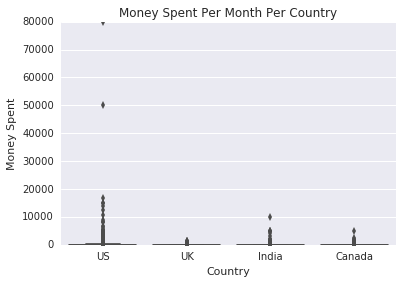

In [11]:
four_countries = survey_clean[survey_clean['CountryLive'].isin(
    ['United States of America', 'India', 'United Kingdom', 'Canada'])]

box = sns.boxplot(x='CountryLive', y='moneyspent', data=four_countries)
plt.title('Money Spent Per Month Per Country')
plt.xlabel('Country')
plt.ylabel('Money Spent')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada'])
plt.show()

We can see some outliers for India but we can't identify yet if this is relevant data. It is a possibility that they attended several bootcamps, which are known to be a bit expensive. We'll examine these data points to see what we can find out.

In [12]:
india_outliers = four_countries[
    (four_countries['CountryLive']=='India')&
    (four_countries['moneyspent']>2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,moneyspent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that no bootcamps were attended. Its hard to figure out from the data where they spent that much on learning. Because the data is ambiguous, we can remove them.

In [13]:
four_countries = four_countries.drop(india_outliers.index)

Some other obvious outliers are for the US. Let's examine them.

In [14]:
us_outliers = four_countries[
    (four_countries['CountryLive']=='United States of America')&
    (four_countries['moneyspent']>6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,moneyspent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000


According to the data, six out of the eleven people attended bootcamps which justifies our reasoning. For the remainder, we can't pinpoint the cause for spending. We will drop the rows where they spent over $6,000 but have never attended a bootcamp. We can also see that eight people have only been programming for 3 months or less.

They might have paid a large amount for a bootcamp over the span of a couple of months. These amounts are unrealstic and will be removed.

In [15]:
no_bootcamp = four_countries[
    (four_countries['CountryLive']=='United States of America')&
    (four_countries['moneyspent']>6000)&
    (four_countries['AttendedBootcamp']==0)
]

four_countries = four_countries.drop(no_bootcamp.index)

In [16]:
less_than_3 = four_countries[
    (four_countries['CountryLive']=='United States of America')&
    (four_countries['moneyspent']>6000)&
    (four_countries['MonthsProgramming']<=3)
]

four_countries = four_countries.drop(less_than_3.index)

Looking at the box plot again we can see that an outlier for Canada where someone seems to be spending about $5,000 a month on learning.

In [17]:
canada_outliers = four_countries[
    (four_countries['CountryLive']=='Canada')&
    (four_countries['moneyspent']>4500)
]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,moneyspent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We seem to have the same situation we came across with the US participant where they have been programming for only two months. They probably spent a large amount on a bootcamp in the beginning and didn't spend anything else on learning for the next couple of months. We will take the same approach and just remove this outlier.

In [18]:
four_countries = four_countries.drop(canada_outliers.index)

We will recalculate the mean values and generate a final box plot.

In [19]:
four_countries.groupby('CountryLive').mean()['moneyspent']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: moneyspent, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


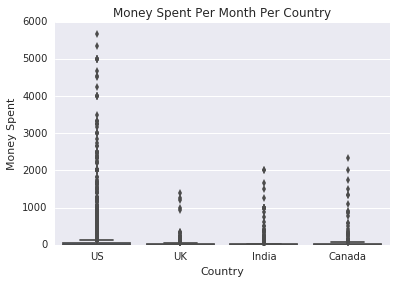

In [20]:
box = sns.boxplot(x='CountryLive', y='moneyspent', data=four_countries)
plt.title('Money Spent Per Month Per Country')
plt.xlabel('Country')
plt.ylabel('Money Spent')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

Putting into consideration that we charge a $59 subscription, Canada would be a good potential market since they spend on average $93 a month on learning.

Before jumping the gun and picking Canada, we should consider looking into India given the larger number of potential customers. We could split the advertising budget in various adjustments, but because this decision is so split, our best option would be to hand the marketing team the results of our findings and let them use their domain knowledge to make the best decision.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.